## MA513-Hands on ML for Cubersecurity----CDI

#### Part1: Logistic Regression for Spam

In [231]:
import pandas as pd
df = pd.read_csv("SMSSpamCollection.csv",delimiter='\t',header=None)

In [232]:
df.head(10)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [233]:
from sklearn.preprocessing import LabelEncoder
#encoding our data, means replace categorical values with numerical ones (the computer can only process with number)
label_encoder = LabelEncoder()
types = label_encoder.fit_transform(df[0])
types[:50]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [235]:
from sklearn.model_selection import train_test_split
# creation our train set and our validation set for cross validation purposes
train_x, test_x, train_y, test_y = train_test_split(df[1], types, test_size = 0.1, random_state = 1 )

In [236]:
train_x.shape

(5014,)

In [237]:
test_x.shape

(558,)

In [238]:
train_y.shape

(5014,)

In [239]:
test_y.shape

(558,)

In [240]:
from sklearn.feature_extraction.text import TfidfVectorizer
# transform the text to fit with the model
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(train_x)

In [241]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x, train_y)
test_x=vectorizer.transform( ['Ok lar... Joking wif u oni...', 'Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ'])
model.predict(test_x)

array([0, 1])

'Ok lar... Joking wif u oni...' ==> is not a spam while Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ' is a spam*

In [176]:
test_x=vectorizer.transform( ['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, whats up?'] )
model.predict(test_x)

array([1, 0])

'URGENT! Your Mobile No 1234 was awarded a Prize' is a spam while 'Hey honey, whats up?' isn't

In [243]:
from sklearn.metrics import confusion_matrix
corpus=[]
for i in df.index:
    corpus.append(str(df[1][i]))
    
test_X=vectorizer.transform(corpus)
pred=model.predict(test_X)
pred_test=pred[:558]
cm=confusion_matrix(test_y,pred_test)
cm

array([[429,  60],
       [ 58,  11]], dtype=int64)

In [244]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("accuracy: ",accuracy*100,"%")

accuracy:  78.85304659498208 %


Text(0.5, 15.0, 'Predicted label')

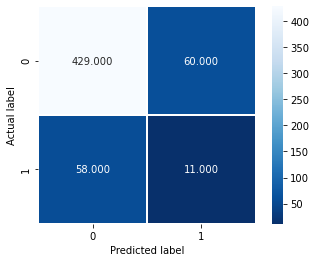

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [246]:
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(),train_x, train_y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [247]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

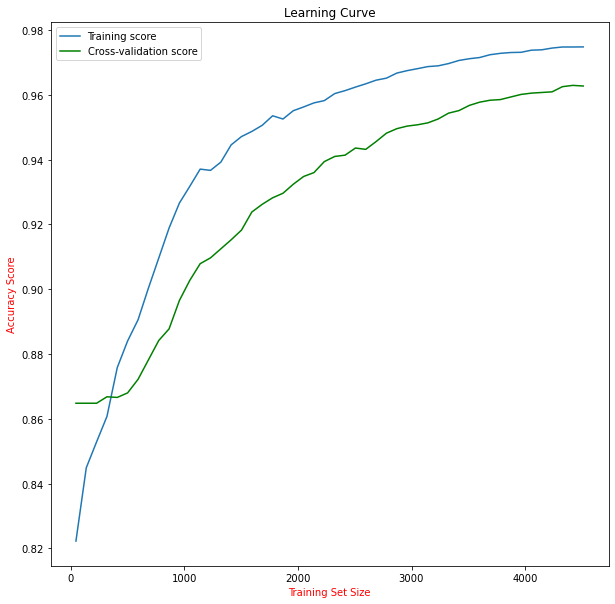

In [248]:

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean,  label="Training score")
plt.plot(train_sizes, test_mean, color='green', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size",color='r'), plt.ylabel("Accuracy Score",color='r'), plt.legend(loc="best")
plt.show()

#### Part2: Naive Bayes

In [219]:
from textblob import TextBlob
def get_tokens(msg):
 return TextBlob(str(msg)).words

In [220]:
def get_lemmas(msg):
 lemmas = []
 words = get_tokens(msg)
 for word in words:
     lemmas.append(word.lemma)
 return lemmas

In [272]:
nbtr_x, nbte_x, nbtr_y, nbte_y = train_test_split(df[1],types )

In [273]:
nbtr_x.shape

(4179,)

In [274]:
nbtr_y.shape

(4179,)

In [275]:
nbte_x.shape

(1393,)

In [276]:
nbte_y.shape

(1393,)

In [277]:
nbtr_x = vectorizer.fit_transform(nbtr_x)
nbte_x=vectorizer.transform( ['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, whats up?'] )
nbte_x

<2x7456 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [278]:
from sklearn.naive_bayes import MultinomialNB
Mnb = MultinomialNB()
model2 = Mnb.fit(nbtr_x, nbtr_y)
model2.predict(nbte_x)

array([1, 0])

In [283]:
corpus2=[]
for i in df.index[:1393]:
    corpus2.append(str(df[1][i]))
#corpus2
nbte_x=vectorizer.transform(corpus2)

In [284]:
model2.score(nbte_x,nbte_y)

0.7810480976310122

#### Part 3: Naive Bayes and SVM

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics

data = pd.read_csv("SMSSpamCollection.csv",delimiter='\t',header=None,encoding='latin-1')
data.head(n=10)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


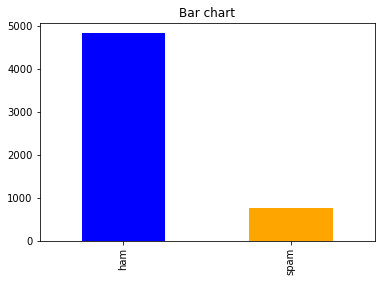

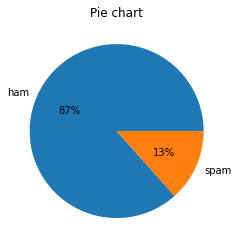

In [288]:
#Distribution spam/non-spam plots

count_Class=pd.value_counts(data[0], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

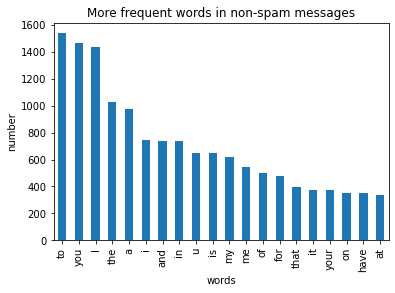

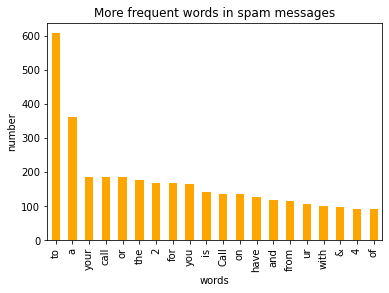

In [289]:
#find the frequencies of words in the spam and non-spam messages

count1 = Counter(" ".join(data[data[0]=='ham'][1]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data[0]=='spam'][1]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [319]:
#Feature engineering

f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data[1])
np.shape(X)

<5572x8480 sparse matrix of type '<class 'numpy.int64'>'
	with 43731 stored elements in Compressed Sparse Row format>

In [304]:
#Transform the variable spam/non-spam into binary variable, then we split our data set in training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, types, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8480), (1839, 8480)]


In [305]:
X_train

<3733x8480 sparse matrix of type '<class 'numpy.int64'>'
	with 29515 stored elements in Compressed Sparse Row format>

In [306]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [308]:
#Multinomial naive bayes classifier
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [311]:
#See the first 10 learning models and their metrics

matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=100)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.997589,0.976618,0.939024,0.891892
1,0.11001,0.997053,0.976074,0.963415,0.871324
2,0.22001,0.996518,0.976074,0.963415,0.871324
3,0.33001,0.996518,0.977705,0.967480,0.878229
4,0.44001,0.996250,0.977705,0.967480,0.878229
...,...,...,...,...,...
95,10.45001,0.977766,0.980968,0.865854,0.990698
96,10.56001,0.977498,0.980424,0.861789,0.990654
97,10.67001,0.977498,0.980424,0.861789,0.990654
98,10.78001,0.977498,0.980424,0.861789,0.990654


In [310]:
#Select the model with the most test precision

best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.290010
Train Accuracy     0.975087
Test Accuracy      0.978793
Test Recall        0.841463
Test Precision     1.000000
Name: 139, dtype: float64

In [312]:
#See if there is more than one model with 100% precision

models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
139,15.29001,0.975087,0.978793,0.841463,1.0
140,15.40001,0.975087,0.978793,0.841463,1.0
141,15.51001,0.974819,0.977705,0.833333,1.0
142,15.62001,0.974819,0.977705,0.833333,1.0
143,15.73001,0.974819,0.977705,0.833333,1.0


In [313]:
#Select which has more test accuracy

best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.290010
Train Accuracy     0.975087
Test Accuracy      0.978793
Test Recall        0.841463
Test Precision     1.000000
Name: 139, dtype: float64

In [314]:
#Confusion matrix with naive bayes classifier

m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1593,0
Actual 1,39,207


In [342]:
from sklearn import svm
list_C = np.arange(0.1, 2, 0.1) 
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
list_C

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [343]:
#Apply the same reasoning applying the support vector machine model with the gaussian kernel
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
i=0
for i in range(len(list_C)):
    clf = make_pipeline(StandardScaler(with_mean=False),SVC(C=list_C[i],kernel="rbf"))
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))

0.866231647634584
0.866231647634584
0.8694942903752039
0.8792822185970636
0.8896139206090267
0.9075584556824361
0.919521479064709
0.9271343121261555
0.9336595976073954
0.9358346927678086
0.9374660141381186
0.9396411092985318
0.9407286568787384
0.9429037520391517
0.9429037520391517
0.9434475258292551
0.9434475258292551
0.9434475258292551
0.9434475258292551
